# Naive Bayes

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [202]:
xtest = pd.read_csv('X_test.csv', header=None)
ytest = pd.read_csv('y_test.csv', header=None)
xtrain = pd.read_csv('X_train.csv', header=None)
ytrain = pd.read_csv('y_train.csv', header=None)

In [203]:
pi_mle = ytrain.mean()

In [204]:
#Create two separate theta parameters per column
#One from the subset of x's matching a y = 0, and one for y = 1

bern_mle_y0 = []
bern_mle_y1 = []

for i in range(54):
    zeroes_list = []
    ones_list = []
    for j in range(len(xtrain)):
        if ytrain[0][j] == 0:
            zeroes_list.append(xtrain[i][j])
        if ytrain[0][j] == 1:
            ones_list.append(xtrain[i][j])
    bern_mle_y0.append(np.mean(zeroes_list))
    bern_mle_y1.append(np.mean(ones_list))

In [205]:
#Create two separate theta parameters per column
#One from the subset of x's matching a y = 0, and one for y = 1

pareto_mle_y0 = []
pareto_mle_y1 = []

for i in (54, 55, 56):
    zeroes_list = []
    ones_list = []  
    for j in range(len(xtrain)):
        if ytrain[0][j] == 0:
            zeroes_list.append(xtrain[i][j])
        if ytrain[0][j] == 1:
            ones_list.append(xtrain[i][j])    

    temp1 = 0
    for k in range(len(zeroes_list)):
        temp1 += np.log(zeroes_list[k])
    pareto_mle_y0.append(len(zeroes_list)/temp1)
    temp2 = 0
    for m in range(len(ones_list)):
        temp2 += np.log(ones_list[m])
    pareto_mle_y1.append(len(ones_list)/temp2)

In [206]:
def bern(theta, x):
    bern_var = (theta**x) * (1 - theta)**(1 - x)
    return bern_var

In [207]:
def pareto(theta, x):
    pareto_var = theta * x**(-theta - 1)
    return pareto_var

In [208]:
#Create a function that calculates based on both possible thetas per column
#Create predict_y0 and predict_y1 vars, pick the greater one for real prediction

In [209]:
predict_y0 = []

for i in range(len(xtest)):
    y0_list = []

    y0_list.append(1 - pi_mle[0])

    for j in range(54):
        y0_list.append(bern(bern_mle_y0[j], xtest[j][i]))

    for j in (54, 55, 56):
        y0_list.append(pareto(pareto_mle_y0[j-54], xtest[j][i])) #HACKY "-54" TO FIX OFFSET DFS 
        
    predict_y0.append(np.prod(y0_list))

In [210]:
predict_y1 = []

for i in range(len(xtest)):
    y1_list = []

    y1_list.append(pi_mle[0])

    for j in range(54):
        y1_list.append(bern(bern_mle_y1[j], xtest[j][i]))

    for j in (54, 55, 56):
        y1_list.append(pareto(pareto_mle_y1[j-54], xtest[j][i])) #HACKY "-54" TO FIX OFFSET DFS 
        
    predict_y1.append(np.prod(y1_list))

In [211]:
predicted_y = []

for i in range(len(xtest)):
    if predict_y0[i] > predict_y1[i]:
        predicted_y.append(0)
    else:
        predicted_y.append(1)

In [212]:
from sklearn.metrics import confusion_matrix

In [213]:
confusion_matrix(ytest, predicted_y)

array([[54,  2],
       [ 5, 32]])

## Naive Bayes Stem Plot

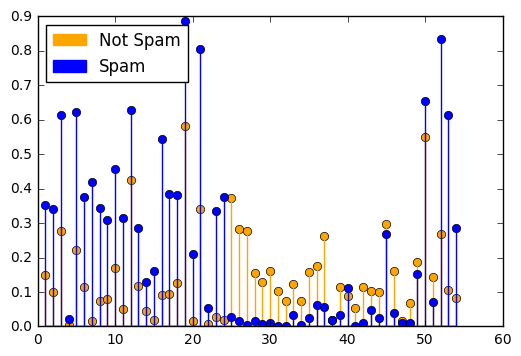

In [250]:
import matplotlib.patches as mpatches

markerline0, stemlines0, baseline0 = plt.stem(range(1, 55), bern_mle_y0, label = 'theta0')
markerline1, stemlines1, baseline1 = plt.stem(range(1, 55), bern_mle_y1, label = 'theta1')
plt.setp(stemlines0, color = 'orange')
plt.setp(markerline0, color = 'orange')

orange_patch = mpatches.Patch(color='orange', label='Not Spam')
blue_patch = mpatches.Patch(color='blue', label='Spam')
plt.legend(handles=[orange_patch, blue_patch], loc = 2)

plt.show()

# KNN

In [290]:
def abs_distance(row1, row2):
    dist = 0
    for j in range(len(row1)):
        dist += abs(row1[j] - row2[j])
    return dist

In [291]:
#store both row number and distance
#get full list of distances, then sort, then take only top k

In [389]:
ypred_all_k = []

for k in range(1,21):
    ypred_knn = []
    for newrow in range(len(xtest)):
        comp_matrix = []
        comp_y = []
        for oldrow in range(len(xtrain)):
            comp_matrix.append([oldrow, abs_distance(xtest.ix[newrow], xtrain.ix[oldrow])]) #xtest.ix[newrow]
        comp_matrix = np.array(comp_matrix)
        comp_matrix = comp_matrix[np.argsort(comp_matrix[:,1])]
        comp_matrix = comp_matrix[0:k][:,0]
        for i in comp_matrix:
            comp_y.append(ytrain.ix[i][0])
        ypred_knn.append(int(round(np.mean(comp_y))))
    ypred_all_k.append(ypred_knn)

In [392]:
np.array(ypred_all_k).shape

(20, 93)

In [396]:
knn_results = pd.DataFrame(ypred_all_k)

In [398]:
knn_results = knn_results.transpose()

In [401]:
from sklearn.metrics import accuracy_score

In [409]:
knn_accuracy = []

for i in range(knn_results.shape[1]):
    knn_accuracy.append(accuracy_score(ytest, knn_results[i]))

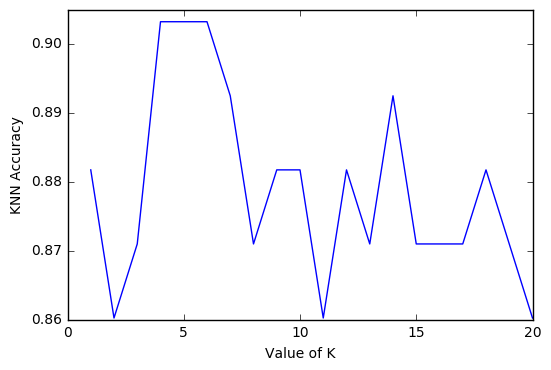

In [413]:
plt.plot(range(1,21), knn_accuracy)
plt.ylabel('KNN Accuracy')
plt.xlabel('Value of K')
plt.show()

In [414]:
knn_accuracy

[0.88172043010752688,
 0.86021505376344087,
 0.87096774193548387,
 0.90322580645161288,
 0.90322580645161288,
 0.90322580645161288,
 0.89247311827956988,
 0.87096774193548387,
 0.88172043010752688,
 0.88172043010752688,
 0.86021505376344087,
 0.88172043010752688,
 0.87096774193548387,
 0.89247311827956988,
 0.87096774193548387,
 0.87096774193548387,
 0.87096774193548387,
 0.88172043010752688,
 0.87096774193548387,
 0.86021505376344087]

In [415]:
!jupyter nbconvert --to script Homework2_Problem2_NaiveBayes_KNN.ipynb

[NbConvertApp] Converting notebook Homework2_Problem2_NaiveBayes_KNN.ipynb to script
[NbConvertApp] Writing 4981 bytes to Homework2_Problem2_NaiveBayes_KNN.py
